## Set up

In [2]:
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import fasttext
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## Get data

In [3]:
df = pd.read_csv('data/data_usampl_60_40_cleaned.csv')

In [4]:
df.head()

,raw,clean,clean_pp,clean_pp_lemma,clean_pp_lemma_stop,toxic
0,Trudeau with a brain? I assume you are taking...,Trudeau with a brain? I assume you are taking ...,trudeau with a brain i assume you are taking a...,trudeau with a brain i assume you be take abou...,trudeau brain assume take pierre imagine,1
1,The Jones Act was immediately lifted to help T...,The Jones Act was immediately lifted to help T...,the jones act was immediately lifted to help t...,the jones act be immediately lift to help texa...,jones act immediately lift help texas florida ...,1
2,As long as the Church keeps preventing the Lor...,As long as the Church keeps preventing the Lor...,as long as the church keeps preventing the lor...,as long as the church keep prevent the lord fr...,long church keep prevent lord call woman sacra...,0
3,"Climate change, in the sense discussed in the ...","Climate change, in the sense discussed in the ...",climate change in the sense discussed in the p...,climate change in the sense discuss in the pop...,climate change sense discuss pope encyclical d...,0
4,Fake news...now she is lying. figures....she i...,Fake news...now she is lying. figures....she i...,fake news now she is lying figures she is maki...,fake news now she be lie figure she be make he...,fake news lie figure make million gosh darn de...,1


In [5]:
X = df['clean_pp_lemma']
y = df['toxic']

### Create labels fasttext as per convention

In [6]:
df['toxic_label_ft'] = "__label__" + df['toxic'].astype(str)
df.head(3)

,raw,clean,clean_pp,clean_pp_lemma,clean_pp_lemma_stop,toxic,toxic_label_ft
0,Trudeau with a brain? I assume you are taking...,Trudeau with a brain? I assume you are taking ...,trudeau with a brain i assume you are taking a...,trudeau with a brain i assume you be take abou...,trudeau brain assume take pierre imagine,1,__label__1
1,The Jones Act was immediately lifted to help T...,The Jones Act was immediately lifted to help T...,the jones act was immediately lifted to help t...,the jones act be immediately lift to help texa...,jones act immediately lift help texas florida ...,1,__label__1
2,As long as the Church keeps preventing the Lor...,As long as the Church keeps preventing the Lor...,as long as the church keeps preventing the lor...,as long as the church keep prevent the lord fr...,long church keep prevent lord call woman sacra...,0,__label__0


In [8]:
df['toxic_label_comment_text'] = df['toxic_label_ft'] + " " + df['clean_pp_lemma']
df.head(3)

,raw,clean,clean_pp,clean_pp_lemma,clean_pp_lemma_stop,toxic,toxic_label_ft,toxic_label_comment_text
0,Trudeau with a brain? I assume you are taking...,Trudeau with a brain? I assume you are taking ...,trudeau with a brain i assume you are taking a...,trudeau with a brain i assume you be take abou...,trudeau brain assume take pierre imagine,1,__label__1,__label__1 trudeau with a brain i assume you b...
1,The Jones Act was immediately lifted to help T...,The Jones Act was immediately lifted to help T...,the jones act was immediately lifted to help t...,the jones act be immediately lift to help texa...,jones act immediately lift help texas florida ...,1,__label__1,__label__1 the jones act be immediately lift t...
2,As long as the Church keeps preventing the Lor...,As long as the Church keeps preventing the Lor...,as long as the church keeps preventing the lor...,as long as the church keep prevent the lord fr...,long church keep prevent lord call woman sacra...,0,__label__0,__label__0 as long as the church keep prevent ...


## Split and train for the fast text model

In [9]:
train,test = train_test_split(df,test_size=0.2, random_state=42, stratify=y) 

In [10]:
train.to_csv("data/fasttext_train", columns=["toxic_label_comment_text"], index=False, header=False)
test.to_csv("data/fasttext_test", columns=["toxic_label_comment_text"], index=False, header=False)

In [11]:
model = fasttext.train_supervised(input="data/fasttext_train", 
                                  lr=0.5, 
                                  epoch=15, 
                                  wordNgrams=2, 
                                  t=0.0001)
model.test("data/fasttext_test")

(78998, 0.8604395047975898, 0.8604395047975898)

In [12]:
sentence_vector = model.get_sentence_vector("I love all kind of people, black, gays, muslims, Christians")

In [13]:
sentence_vector

array([ 0.01654694, -0.0002093 ,  0.01471151,  0.00172857, -0.00078496,
        0.0311403 , -0.03102514, -0.00949609,  0.00315739,  0.02262093,
       -0.02799701,  0.01514469, -0.05028974, -0.00395825, -0.06888914,
        0.01130407, -0.017983  , -0.00388614, -0.00910216,  0.00164457,
        0.03739968,  0.04255857,  0.03685927,  0.00853041,  0.0004758 ,
       -0.00025271, -0.02128115, -0.01046227, -0.01866019,  0.0183231 ,
        0.00954161, -0.0117243 , -0.0450534 , -0.05547785, -0.00818254,
       -0.00460414,  0.00583202,  0.02446175, -0.01441845, -0.01676674,
       -0.03559923,  0.08089427,  0.0267739 ,  0.04850958,  0.09594744,
       -0.00594079,  0.03025994, -0.02314882, -0.0060195 ,  0.01567516,
       -0.01482827,  0.01257842, -0.02262961,  0.01042524,  0.00081162,
       -0.02376285, -0.01666445, -0.00335703,  0.01743778, -0.00055778,
       -0.01768005,  0.0367616 ,  0.01363739,  0.014525  , -0.00193496,
        0.01369014, -0.02259143,  0.02415279, -0.00957898,  0.02

In [17]:
model.predict("I love all kind of people, black, gays, muslims, Christians")

(('__label__0',), array([1.00001001]))

In [18]:
model.predict("Idiots! I hate you")

(('__label__1',), array([0.76616818]))

In [29]:
# Load the test data
test_df = pd.read_csv("data/fasttext_test", header=None)

In [30]:
test_df

,0
0,__label__1 never underestimate the stupidity o...
1,__label__1 noise that tired old navy statement...
2,__label__1 where be our feminist pm and why be...
3,__label__1 mayor berkowitz a hypocrite yes the...
4,__label__1 it be chretien and martin as the ba...
...,...
79682,__label__0 i guess it be safe if you do not ha...
79683,__label__0 speak the truth be no way to garner...
79684,__label__1 so senseless and so tragic no paren...
79685,__label__1 on the basis of your ignorance then...


In [31]:
true_labels = test_df[0].apply(lambda x: 1 if x.split()[0] == '__label__1' else 0).tolist()

In [33]:
# Predict labels for the test data
predicted_labels = []
for index, row in test_df.iterrows():
    label, _ = model.predict(" ".join(row[0].split()[1:]))  # Exclude the label from the text
    predicted_labels.append(1 if label[0] == '__label__1' else 0)

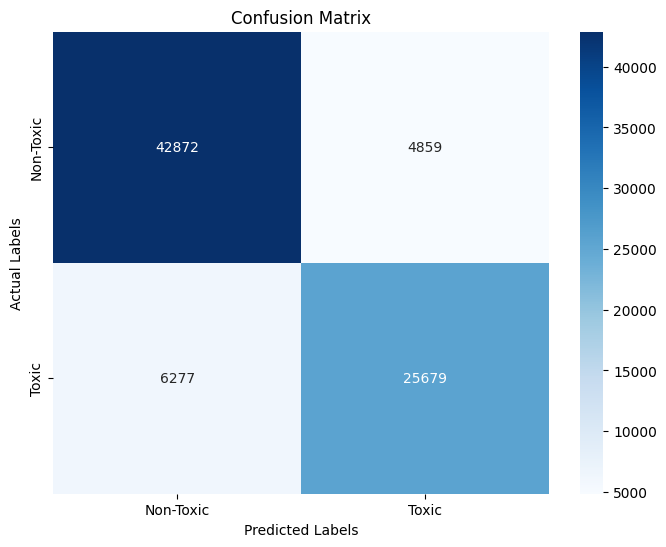

In [35]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()